<a href="https://colab.research.google.com/github/angelFelixCarrasco/RergresionLineal/blob/main/RegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Calcula precio Honda Hermosillo 2004
Calcula precio de Toyota Hermosillo: 2004
Calcula el precio de Honda Obregon: 2004
Calcula el precio de Honda Hermosillo: 2004
[50255.39514279]
[20725.91026113]
[53627.54409769]
[74368.73965232]


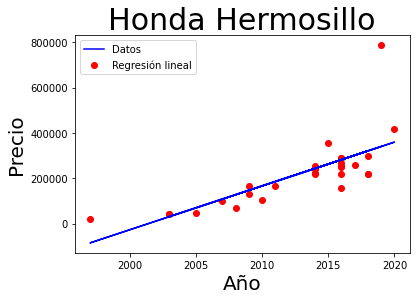

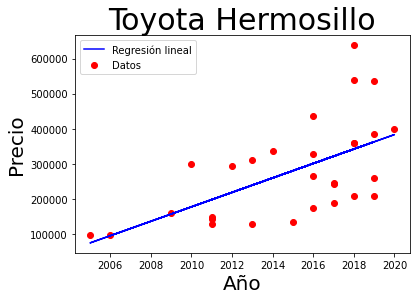

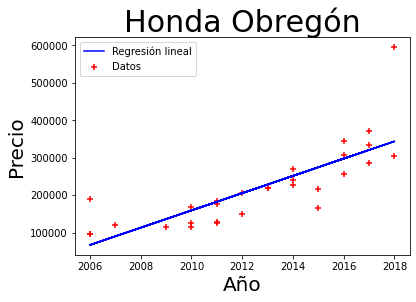

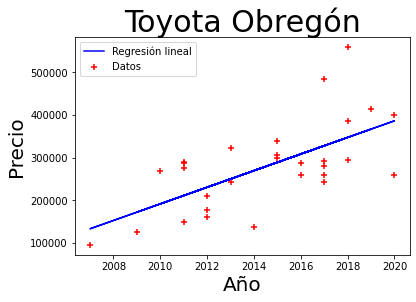

In [41]:
#| Proyecto: MNC Proyecto Final - Aplicación para estimación de automóviles de segunda mano en Sonora.
# Autor: Alberto Ángel Félix Carrasco. 
#| Idioma: Python 3.8. 
#| Solución: python 3.8.
#| Proyectos:  mncentrenamiento.ipynb      
#| Para compilar: Solo le da click en RUN y se ejecuta.
#| Software: mncentrenamiento.ipynb
#| Plataforma: Windows 10 Home versión 2004.
#Instructor:  Doctor Jesús Villavicencio. 
#| Fecha de vencimiento: 3 de Diciembre del 2020.
#-------------------------------------------------------------------------------------------------------------- 
# Descripción: Realiza el método matematico de regresión linear, y calcula estimados de un conjunto de datos.
#Entrada: Archivos .CSV donde vengan tablas de datos para que el método haga su trabajo.

import matplotlib.pyplot as plt #IMPORTAMOS LIBRERÍA QUE SE USA PARA LAS GRÁFICAS
import pandas as pd #LIBRERÍA QUE VAMOS A USAR PARA LEER LOS ARCHIVOS .CSV O EXCEL
from sklearn import linear_model #LIBRERÍA QUE NOS AYUDA AL APLICAR REGRESIÓN LINEAR A LOS DATOS QUE LE INSERTEMOS
#--------------------------------#

#INSTANCIAMOS PARA QUE LA LIBRERIA PANDA LEA LOS ARCHIVOS QUE GUARDAMOS EN EL SCRIPT
df = pd.read_csv("hondahmofinal2.csv") #HONDA HERMOSILLO
obson = pd.read_csv('hondaobsonf.csv') #HONDA OBREGÓN
th = pd.read_csv('toyotahmof.csv') #TOYOTA HERMOSILLO
to = pd.read_csv('toyotaobsonf.csv') #TOYOTA OBREGÓN
#------------------------------------#

#AQUÍ SE INSTANCIA LAS COLUMNAS DE CADA TABLA QUE USAMOS QUE SON PRECIO Y AÑO
new_df = df.drop('Precio',axis='columns') #AÑO HONDA HERMOSILLO
preciohmohonda = df.Precio #PRECIO HONDA HERMOSILLO

añoth = th.drop('Precio', axis='columns') #AÑO TOYOTA HERMOSILLO
precioth= th.Precio #PRECIO TOYOTA HERMOSILLO

año = obson.drop('Precio', axis='columns')#AÑO HONDA OBREGÓN
preciohondaobregon = obson.Precio #PRECIO HONDA OBREGÓN

añoto = to.drop('Precio', axis='columns')#AÑO TOYOTA OBREGÓN
precioto= to.Precio #PRECIO TOYOTA OBREGÓN
#-------------------------------------#

#VOLVEMOS A INSTANCIAR PARA QUE ENTRENE EL MODELO CON NUESTROS DOS DATOS LA CONSTANTE Y NUESTRO COEFICIENTE
reg = linear_model.LinearRegression() #INSTANCIAMOS EL METODO 
reg.fit(new_df,preciohmohonda) #AQUÍ SE USA EL METODO FIT Y LE PONE LOS PARAMETROS DE ENTRENAMIENTO LOS DATOS DE HONDA HERMOSILLO

reg2 = linear_model.LinearRegression()
reg2.fit(año,preciohondaobregon)#AQUÍ SE USA EL METODO FIT Y LE PONE LOS PARAMETROS DE ENTRENAMIENTO LOS DATOS DE HONDA OBREGÓN

reg3 = linear_model.LinearRegression()
reg3.fit(añoth,precioth)#AAQUÍ SE USA EL METODO FIT Y LE PONE LOS PARAMETROS DE ENTRENAMIENTO LOS DATOS DE TOYOTA HERMOSILLO

reg4 = linear_model.LinearRegression()
reg4.fit(añoto,precioto)#AQUÍ SE USA EL METODO FIT Y LE PONE LOS PARAMETROS DE ENTRENAMIENTO LOS DATOS DE TOYOTA OBREGÓN
#---------------------------------------#

#AQUÍ USAREMOS LA LIBRERIA PARA ELABORAR LAS GRÁFICAS
%matplotlib inline
hmo = plt #INSTANCIAMOS LA LIBRERIA PARA QUE CADA UNO TENGA SU PROPIO NOMBRE
hmo.figure('Honda Hermosillo') #USAMOS EL MÉTODO FIGURE PARA QUE REPRODUZCA LA GRÁFICA EN UNA IMAGEN
hmo.title('Honda Hermosillo', fontsize=30) #USAMOS EL MÉTODO TITLE PARA DARLE TÍTULO A LA GRÁFICA
hmo.xlabel('Año', fontsize=20) #USAMOS EL METODO XLABEL PARA PONERLE NOMBRE A LAS X(AÑOS) DE NUESTRA GRÁFICA
hmo.ylabel('Precio', fontsize=20)#USAMOS EL METODO YLABEL PARA PONER NOMBRE A LAS Y(PRECIO) DE NUESTRA GRÁFICA
hmo.scatter(df.Año,df.Precio,color="red")#USAMOS EL METODO SCATTER PARA QUE SE ELABORA LA GRAFICA DE PUNTOS CON LOS PARAMETROS DE LA TABLA QUE ESTEMOS USANDO
hmo.plot(df.Año,reg.predict(df[['Año']]),color="blue")#USAMOS EL METODO PLOT PARA QUE DIBUJE LA RECTA DE LA REGRESION LINEAR CON LOS PARAMETROS DEL METODO
hmo.legend(labels=['Datos', 'Regresión lineal'])#USAMOS EL METODO LEGEND PARA DAR UNA LEYENDA DE QUE SON LOS DATOS QUE MUESTRA EN LA GRAFICA
hmo.show #CON ESTE REPRODUCE LA IMAGEN

#SE VUELVEN A REPETIR LA ELABORACIÓN DE GRÁFICAS SOLO CAMBIANDO LOS PARAMETROS PARA QUE MUESTRE CADA GRÁFICA CON EL ENTRENAMIENTO
hmo2 = plt
hmo2.figure('Toyota Hermosillo')
hmo2.title('Toyota Hermosillo', fontsize=30)
hmo2.xlabel('Año', fontsize=20)
hmo2.ylabel('Precio', fontsize=20)
hmo2.scatter(th.Año,th.Precio,color="red")
hmo2.plot(th.Año,reg3.predict(th[['Año']]),color="blue")
hmo2.legend(labels=['Regresión lineal', 'Datos'])
hmo2.show

obs = plt
obs.figure('Honda Obregón')
obs.title('Honda Obregón',fontsize=30)
obs.xlabel('Año',fontsize=20)
obs.ylabel('Precio',fontsize=20)
obs.scatter(obson.Año,obson.Precio,color="red", marker="+")
obs.plot(obson.Año,reg2.predict(obson[['Año']]),color="blue")
obs.legend(labels=['Regresión lineal', 'Datos'])
obs.show

obs2 = plt
obs2.figure('Toyota Obregón')
obs2.title('Toyota Obregón',fontsize=30)
obs2.xlabel('Año',fontsize=20)
obs2.ylabel('Precio',fontsize=20)
obs2.scatter(to.Año,to.Precio,color="red", marker="+")
obs2.plot(to.Año,reg4.predict(to[['Año']]),color="blue")
obs2.legend(labels=['Regresión lineal', 'Datos'])
obs2.show
#-----------------------------------------------------#
#AQUI VAMOS A SELECCIONAR EL AÑO QUE QUEREMOS BUSCAR MEDIANTE UN INPUT   
x0 = input('Calcula precio Honda Hermosillo ')
x1 = input('Calcula precio de Toyota Hermosillo: ')
x2 = input('Calcula el precio de Honda Obregon: ')
x3 = input('Calcula el precio de Honda Hermosillo: ')

#AQUI LO PARSEAMOS
x0 = float(x0)
x1 = float(x1)
x2 = float(x2)
x3 = float(x3)

#AQUI HACEMOS QUE ESE NUMERO APLIQUE EL METODO MATEMICO DE REGRESION LINEAL
x0f = reg.predict([[x0]])
x1f =reg2.predict([[x1]])
x2f =reg3.predict([[x2]])
x3f =reg4.predict([[x3]])

#AQUI IMPRIMIMOS LOS RESULTADOS
print(x0f)
print(x1f)
print(x2f)
print(x3f)


#RESULTADO: Imprime las graficas una por una de los datos ordenados y con la regresión linear desplaza por los puntos.

#ERRORES CONOCIDOS: En veces si los archivos .csv tienen formato de pesos, no los puede convertir el programa a int.


